## Fine-Tuning LayoutLMv3 Using FUNSD Dataset

Dataset Source: https://huggingface.co/datasets/nielsr/funsd-layoutlmv3

#### Install Necessary Libraries

In [1]:
%pip install datasets transformers tensorboard seqeval accelerate torch -U

Note: you may need to restart the kernel to use updated packages.


#### Import Necessary Libraries

In [17]:
import os, sys


import numpy as np

import PIL
from PIL import ImageDraw, ImageFont

import datasets
from datasets import load_dataset

import torch

import transformers
from transformers import (
    AutoProcessor,
    AutoModelForTokenClassification
)

!git lfs install

Git LFS initialized.


#### Display Library Versions

In [18]:
library_len = 14
version_len = 12

print(f"+{'-' * (library_len + version_len + 5)}+")
print("|",
      "Library".rjust(library_len),
      "|",
      "Version".ljust(version_len),
      "|")

print(f"|{'-' * (library_len + version_len + 5)}|")

print("|",
      "Python".rjust(library_len),
      "|",
      sys.version[0:6].ljust(version_len),
      "|")

print("|",
      "PyTorch".rjust(library_len),
      "|",
      torch.__version__.ljust(version_len),
      "|")

print("|",
      "Datasets".rjust(library_len),
      "|",
      datasets.__version__.ljust(version_len),
      "|")

print("|",
      "Transformer".rjust(library_len),
      "|",
      transformers.__version__.ljust(version_len),
      "|")

print(f"+{'-' * (library_len + version_len + 5)}+")

+-------------------------------+
|        Library | Version      |
|-------------------------------|
|         Python | 3.9.12       |
|        PyTorch | 2.0.1        |
|       Datasets | 2.14.5       |
|    Transformer | 4.33.2       |
+-------------------------------+


#### Define Basic Values/Constants

In [19]:
INFERENCE_MODEL_NAME = f"DunnBC22/layoutlmv3-base-fine_tuned-FUNSD_dataset"
DATASET_NAME = "nielsr/funsd-layoutlmv3"
DATASET_SPLIT = "test"

#### Load Dataset

In [20]:
dataset = load_dataset(DATASET_NAME, split=DATASET_SPLIT)

dataset

Dataset({
    features: ['id', 'tokens', 'bboxes', 'ner_tags', 'image'],
    num_rows: 50
})

#### Define Processor & Model

In [21]:
processor = AutoProcessor.from_pretrained(INFERENCE_MODEL_NAME)
model = AutoModelForTokenClassification.from_pretrained(INFERENCE_MODEL_NAME)

#### Display Information About Sample

In [22]:
sample = dataset[12]

sample.keys()

dict_keys(['id', 'tokens', 'bboxes', 'ner_tags', 'image'])

#### Prepare Sample for Model Using Processor

In [23]:
image = sample['image']
words = sample['tokens']
boxes = sample['bboxes']

word_labels = sample['ner_tags']

encoded_sample = processor(image, 
                           words, 
                           boxes=boxes, 
                           word_labels=word_labels, 
                           return_tensors="pt")

for k,v in encoded_sample.items():
    print(f"{k}: {v.shape}")

input_ids: torch.Size([1, 270])
attention_mask: torch.Size([1, 270])
bbox: torch.Size([1, 270, 4])
labels: torch.Size([1, 270])
pixel_values: torch.Size([1, 3, 224, 224])


#### Complete a Forward Pass

In [24]:
with torch.no_grad():
    outputs = model(**encoded_sample)

/Users/briandunn/Desktop/python_venvs/text_sum/lib/python3.9/site-packages/transformers/modeling_utils.py:909: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


#### Display Shape of Output Logits

In [25]:
logits = outputs.logits
logits.shape

torch.Size([1, 270, 7])

#### Display Token Prediction (as Integer Values)

In [26]:
preds = logits.argmax(-1).squeeze().tolist()

preds

[6,
 0,
 0,
 0,
 0,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,


#### Display Token Prediction (as String Values)

In [27]:
labels = encoded_sample.labels.squeeze().tolist()

labels

[-100,
 0,
 -100,
 -100,
 -100,
 3,
 -100,
 3,
 -100,
 3,
 -100,
 3,
 -100,
 3,
 -100,
 -100,
 -100,
 -100,
 1,
 -100,
 -100,
 2,
 2,
 -100,
 -100,
 0,
 -100,
 -100,
 0,
 -100,
 0,
 -100,
 0,
 -100,
 0,
 0,
 -100,
 -100,
 -100,
 0,
 0,
 -100,
 0,
 0,
 0,
 -100,
 0,
 -100,
 0,
 -100,
 0,
 0,
 -100,
 0,
 0,
 -100,
 0,
 -100,
 0,
 -100,
 0,
 0,
 -100,
 0,
 0,
 -100,
 0,
 -100,
 0,
 -100,
 -100,
 0,
 -100,
 0,
 -100,
 -100,
 0,
 -100,
 -100,
 0,
 0,
 -100,
 0,
 0,
 -100,
 -100,
 0,
 -100,
 0,
 -100,
 0,
 0,
 -100,
 -100,
 0,
 0,
 -100,
 0,
 -100,
 0,
 0,
 -100,
 -100,
 0,
 -100,
 -100,
 0,
 -100,
 0,
 0,
 -100,
 -100,
 0,
 -100,
 -100,
 0,
 -100,
 0,
 0,
 0,
 0,
 -100,
 -100,
 -100,
 0,
 -100,
 0,
 0,
 -100,
 0,
 0,
 -100,
 0,
 0,
 0,
 0,
 -100,
 -100,
 -100,
 -100,
 0,
 -100,
 -100,
 -100,
 0,
 0,
 -100,
 -100,
 0,
 -100,
 -100,
 0,
 0,
 -100,
 -100,
 -100,
 0,
 0,
 -100,
 0,
 -100,
 -100,
 -100,
 -100,
 0,
 0,
 0,
 0,
 0,
 -100,
 -100,
 0,
 0,
 0,
 -100,
 0,
 0,
 -100,
 -100,
 0,
 0,
 -1

#### Define Function to Prepare Token Boxes

In [29]:
def unnormalize_box(bbox,
                    width,
                    height):
    return [
        width * (bbox[0] / 1000),
        height * (bbox[1] / 1000),
        width * (bbox[2] / 1000),
        height * (bbox[3] / 1000),
    ]
    

#### Apply Above Function & Prepare Token Boxes 

In [30]:
token_bboxes = encoded_sample.bbox.squeeze().tolist()
width, height = image.size

true_preds = [model.config.id2label[pred] for pred, label in zip(preds, labels)
              if label != -100]
true_labels = [model.config.id2label[label] for pred, label in zip(preds, labels)
               if label != -100]
true_boxes = [unnormalize_box(bbox, width, height) for bbox, label in zip(token_bboxes, labels)
              if label != -100]

#### Display Predicted Token Boxes on Sample

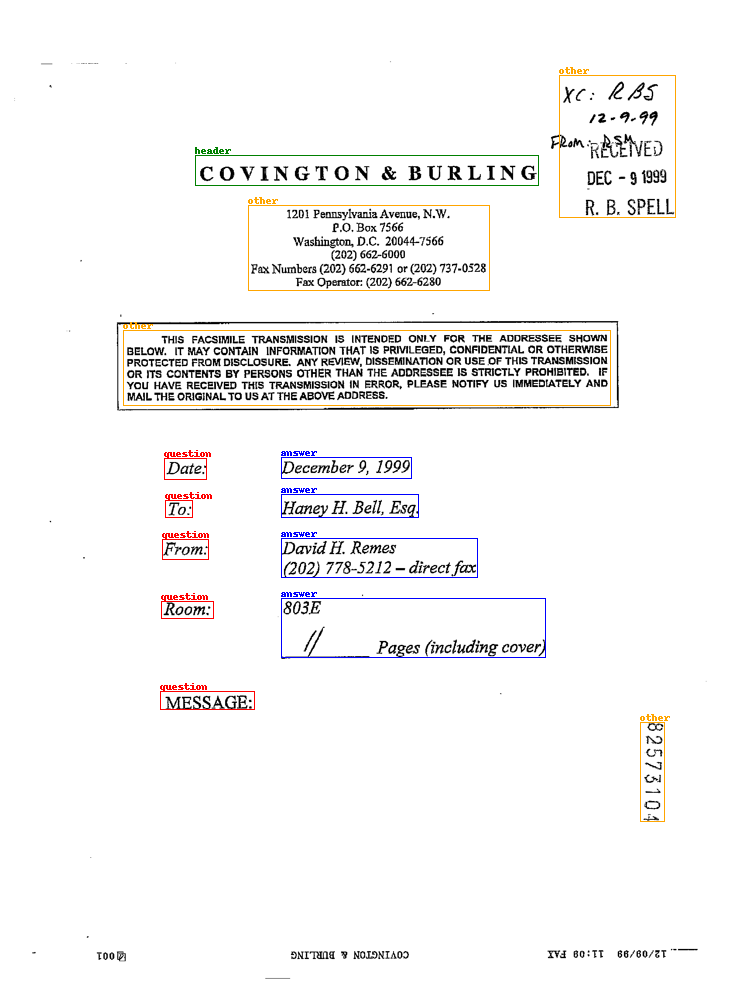

In [32]:
draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

def iob_to_label(label):
    label = label[2:]
    if not label:
        return 'other'
    return label

label2color_converter = {'question': 'red',
                         'answer': 'blue',
                         'header': 'green',
                         'other': 'orange'}

for pred, box in zip(true_preds, true_boxes):
    pred_label = iob_to_label(pred).lower()
    draw.rounded_rectangle(box, outline=label2color_converter[pred_label])
    draw.text((box[0], box[1] - 10), 
              text=pred_label,
              fill=label2color_converter[pred_label], 
              font=font)

image

#### Compare Predicted Token Boxes on Sample to Ground Truth

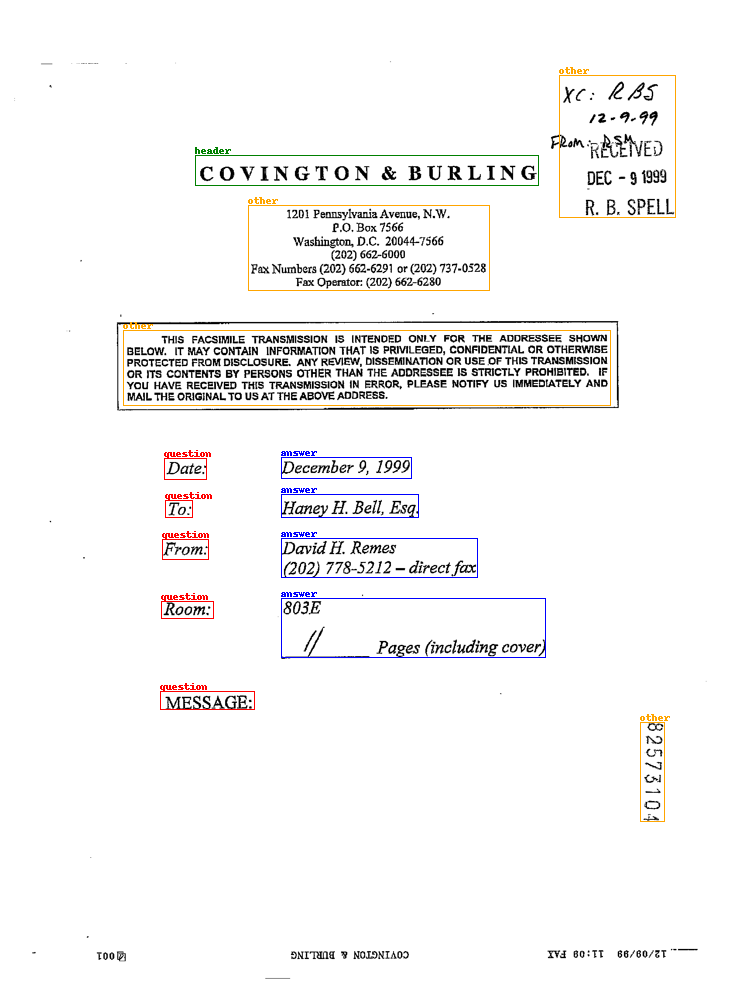

In [34]:
id2label = {
    0: 'O', 
    1: 'B-HEADER', 
    2: 'I-HEADER', 
    3: 'B-QUESTION', 
    4: 'I-QUESTION', 
    5: 'B-ANSWER', 
    6: 'I-ANSWER'
}

gt_image = sample['image']
gt_image = gt_image.convert("RGB")

gt_draw = ImageDraw.Draw(gt_image)

for word, box, label in zip(sample['tokens'],
                            sample['bboxes'],
                            sample['ner_tags']):
    actual_label = iob_to_label(id2label[label]).lower()
    box = unnormalize_box(box, width, height)
    draw.rounded_rectangle(box,
                           outline=label2color_converter[actual_label],
                           width=2)
    draw.text((box[0] + 10, box[1] - 10),
              actual_label, 
              fill=label2color_converter[actual_label],
              font=font)

gt_image

### Notes & Other Takeaways From This Project

****
- Fine-tuning and evaluation this trained model in a separate file.

****

### Citations

- Dataset
    > https://huggingface.co/datasets/nielsr/funsd-layoutlmv3

- Base Model Checkpoint
    > @inproceedings{huang2022layoutlmv3, author={Yupan Huang and Tengchao Lv and Lei Cui and Yutong Lu and Furu Wei}, title={LayoutLMv3: Pre-training for Document AI with Unified Text and Image Masking}, booktitle={Proceedings of the 30th ACM International Conference on Multimedia}, year={2022}}